In [53]:
# importing the necessary modules
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,tan,radians
from sympy import *

In [54]:
# given variables

# initial time (s)
t0 = 0
# final time (s)
tf = 1.2

# mass of the object (kg)
m = 0.625
# drag parameter (kg / m)
c = 0.015
# gravitational acceleration (m/s^2)
g = 9.8

# initial x-position (m)
x0 = 0
# initial y-position (m)
y0 = 2
# initial angle (degrees)
theta0 = 10

# final x-position (target x-position) (m)
xf = 7.239
# final y-position (target y-position) (m)
yf = 3.048

In [55]:
# time-step (s)
dt = 0.01

# initial speed (m/s)
v0 = 7

In [56]:
# velocity at t = t_0
vx0 = 7*(2)**(0.5)/2
vy0 = 7*(2)**(0.5)/2

# acceleration at t = t_0
ax0 = -c/m*vx0*(vx0**2+vy0**2)**(0.5)
ay0 = -g-c/m*vy0*(vx0**2+vy0**2)**(0.5)

# velocity and position at t = t_1
vx1 = vx0+ax0*dt
vy1 = vy0+ax0*dt
x1 = x0+(vx1+vx0)/2*dt
y1 = y0+(vy1+vy0)/2*dt
# print(float(vx1),float(vy1))
# acceleration at t = t_1
ax1 = -c/m*vx1*(vx1**2+vy1**2)**(0.5)
ay1 = -g-c/m*vy1*(vx1**2+vy1**2)**(0.5)

# velocity and position at t = t_2
vx2 = vx1+ax1*dt
vy2 = vy1+ax1*dt
x2 = x1+vx2*dt
y2 = y1+vy2*dt

In [57]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
def eulerMethod(m, c, g, x0, y0, xf, yf, v0, theta0, t0, dt, tf):
    '''
    Initializing variables and preparing the loop
    '''
    # angle in radians (do not modify)
    theta0 = np.radians(theta0)
    # time array (do not modify)
    t = np.arange(t0, tf + dt, dt)

    # position arrays (do not modify)
    x = np.zeros(np.size(t))
    y = np.zeros(np.size(t))

    # velocity arrays (do not modify)
    vx = np.zeros(np.size(t))
    vy = np.zeros(np.size(t))

    # initial positions (do not modify)
    x[0], y[0] = x0, y0

    # velocity at t = 0 
    
    vx[0] = v0*(2)**(0.5)/2
    vy[0] = v0*(2)**(0.5)/2

    # loop through the time array
    for n in range(len(t) - 1):

        # current time acceleration
        axn = -c/m*vx[n]*(vx[n]**2+vy[n]**2)**(0.5)
        ayn = -g-c/m*vy[n]*(vx[n]**2+vy[n]**2)**(0.5)

        # velocity at next timestep
        vx[n + 1] = vx[n]+axn*dt
        vy[n + 1] = vy[n]+ayn*dt

        # position at next timestep
        x[n + 1] = x[n]+vx[n]*dt
        y[n + 1] = y[n]+vy[n]*dt

        # break the loop if the y-position is below zero
        if y[n] < 0:
            break
    return vx, vy, x, y

In [58]:
v0 = 9.78

In [59]:
dt = 0.01

In [60]:
# calling the function on the variables defined above
vx, vy, x, y = eulerMethod(m, c, g, x0, y0, xf, yf, v0, theta0, t0, dt, tf)

In [61]:
'''
If your final time is too large, you will find zero values since the loop stops
when the y-position is less than zero. We will remove this problem here to ensure
smooth plotting
'''
# Set values of zero to NaN (not a number) since matplotlib will not plot those values, excluding the initial points
for i in range(1, len(vx)):
    if x[i] == 0:
        x[i] = np.nan
    if y[i] <= 0:
        y[i] = np.nan

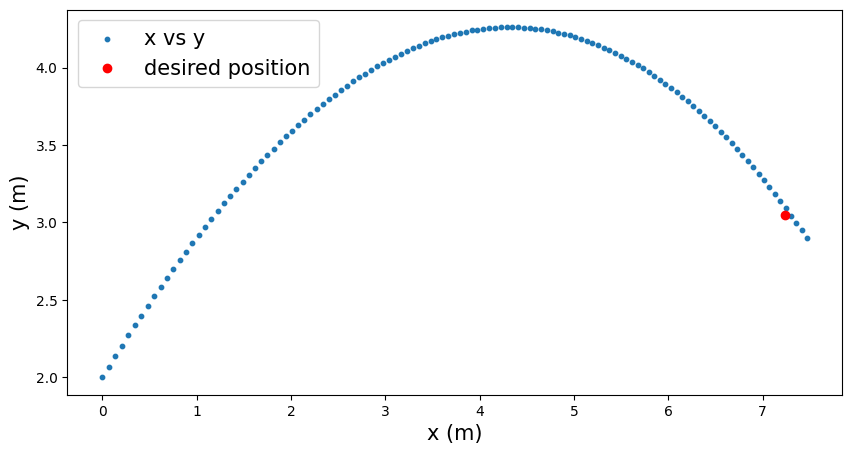

In [62]:
# plotting
fig = plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=10, label='x vs y')
plt.plot(xf, yf, 'ro', label='desired position')
plt.xlabel('x (m)', fontsize=15)
plt.ylabel('y (m)', fontsize=15)
plt.legend(loc='best', fontsize=15)